In [63]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

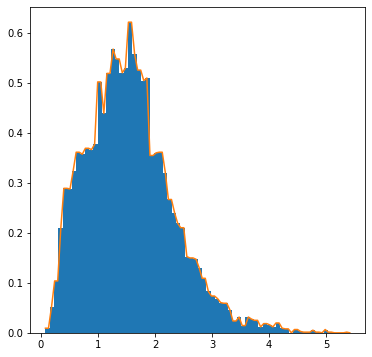

In [74]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(6,6))

cont, bins = np.histogram(z, bins = 70, density=True)
ax.hist(z, bins=bins, density=True)

from scipy.stats import rv_histogram
function = rv_histogram((cont, bins))

xaxis = np.linspace(np.min(z), np.max(z), 100)
plt.plot(xaxis,function.pdf(xaxis), c='tab:orange')

Text(0.5, 1.0, 'Rejection method: pdf')

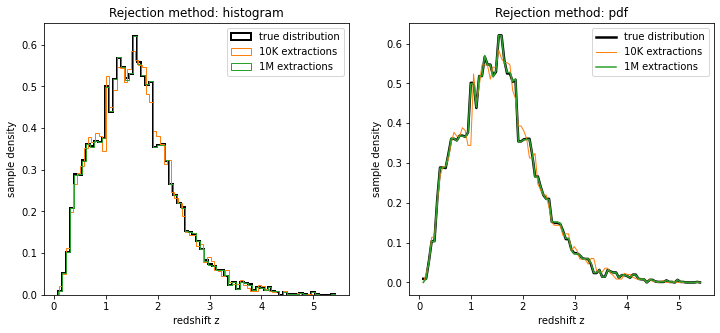

In [71]:
good_x  = function.rvs(size=10000)
good_x2 = function.rvs(size=1000000)

f1 = rv_histogram(np.histogram(good_x, density=True, bins=70))
f2 = rv_histogram(np.histogram(good_x2, density=True, bins=70))

fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].hist(z, bins=70, density=True, histtype='step', color='black', lw=2, label ='true distribution')
ax[0].hist(good_x, bins = 70, density=True, histtype='step', lw=1, color='tab:orange', label = '10K extractions')
ax[0].hist(good_x2, bins = 70, density=True, histtype='step', lw=1, color='tab:green', label = '1M extractions')
ax[0].legend()
ax[0].set_xlabel('redshift z')
ax[0].set_ylabel('sample density')
ax[0].set_title('Rejection method: histogram')

ax[1].plot(xaxis, function.pdf(xaxis), color='black', lw=2.5, label ='true distribution')
ax[1].plot(xaxis, f1.pdf(xaxis), color='tab:orange', lw=1, label = '10K extractions')
ax[1].plot(xaxis, f2.pdf(xaxis), color='tab:green', lw=1.5, label = '1M extractions')
ax[1].legend()
ax[1].set_xlabel('redshift z')
ax[1].set_ylabel('sample density')
ax[1].set_title('Rejection method: pdf')

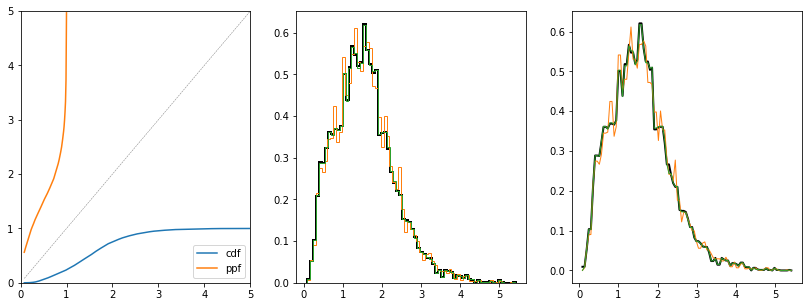

In [113]:
fig, ax = plt.subplots(1,3, figsize=(14,5))

xaxis1 = np.linspace(np.min(z), np.max(z), 500)

ax[0].plot(xaxis1, function.cdf(xaxis1), label='cdf')
ax[0].plot(xaxis1, function.ppf(xaxis1), label='ppf')
ax[0].plot(xaxis1, xaxis1, ls='--', lw=0.5, c='grey')
ax[0].legend()
ax[0].set_xlim(0,5)
ax[0].set_ylim(0,5)

x_inv = np.random.uniform(size=10000)
y_inv = function.ppf(x_inv)

x_inv1 = np.random.uniform(size=1000000)
y_inv1 = function.ppf(x_inv1)

ax[1].hist(z, bins = 70, density=True, histtype='step', lw=2, color='black', label = 'true distribution')
ax[1].hist(y_inv, bins = 70, density=True, histtype='step', lw=1, color='tab:orange', label = '10K extractions')
ax[1].hist(y_inv1, bins = 70, density=True, histtype='step', lw=1, color='tab:green', label = '1M extractions')

ax[2].plot(xaxis, function.pdf(xaxis), lw=2, color='black', label = 'true distribution')
ax[2].plot(xaxis, rv_histogram(np.histogram(y_inv, bins=70, density=True)).pdf(xaxis),
           lw=1, color='tab:orange', label = '10K extractions')
ax[2].plot(xaxis, rv_histogram(np.histogram(y_inv1, bins=70, density=True)).pdf(xaxis), 
           lw=1, color='tab:green', label = '1M extractions')

Text(0, 0.5, 'quasar density')

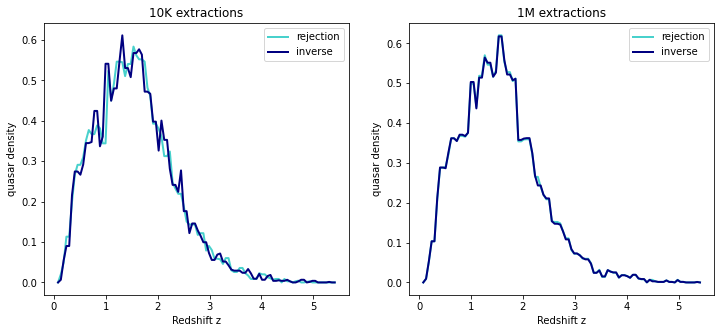

In [115]:
#comparing the two methods
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(xaxis, f1.pdf(xaxis), color='mediumturquoise', lw=2, label = 'rejection')
ax[0].plot(xaxis, rv_histogram(np.histogram(y_inv, bins=70, density=True)).pdf(xaxis),
           lw=2, color='navy', label = 'inverse')
ax[0].legend()
ax[0].set_title('10K extractions')
ax[0].set_xlabel('Redshift z')
ax[0].set_ylabel('quasar density')

ax[1].plot(xaxis, f2.pdf(xaxis), color='mediumturquoise', lw=2, label = 'rejection')
ax[1].plot(xaxis, rv_histogram(np.histogram(y_inv1, bins=70, density=True)).pdf(xaxis), 
           lw=2, color='navy', label = 'inverse')
ax[1].legend()
ax[1].set_title('1M extractions')
ax[1].set_xlabel('Redshift z')
ax[1].set_ylabel('quasar density')